## User input

Enter the file path, value of k for k-means algorithm 

In [31]:


file_path = input("Specify the file path : ")

k = int(input("Specify the value of k : "))


# K means algorithm

## Importing libraries

In [32]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import random as rd


## Data Preprocessing

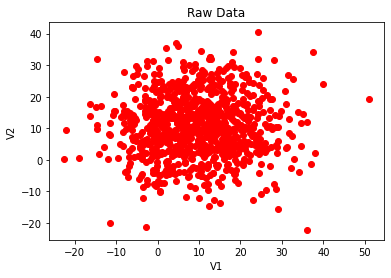

In [39]:
#reading the file

dataFrame = pd.read_csv(file_path)
#name of features to be read from the csv file
feature_1 = 'V1'
feature_2 = 'V2'
dataFrame = dataFrame[[feature_1, feature_2]]

#data values in pandas array form
data = dataFrame.values



no_of_features = data.shape[1]
no_of_points = data.shape[0]


#============ Optional Part: If one wants to normalize data ============#

#normalise data for each column with mean 0 and std deviation 1
# for i in range(no_of_features):
#     std_deviation = np.std(data[:, i]) #calculates std devation for each feature
#     data[:,i] -= np.mean(data[:, i])   #subtract mean from each column
#     data[:, i] /= std_deviation

#============ Optional Part: If one wants to normalize data end ============#

#? find a way to adjust the code (wherever necessary) when we will have more than 2 features.
#plotting the data for visualisation
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('Raw Data')
for data_point in data:
    plt.plot(data_point[0], data_point[1])


### K means function

In [5]:
# funcion kmeans : arguments - data, k ; returns list of centroids and clusters

def kmeans(data, k):
    
    tolerance = 0.001
    
    #randomly initialising centroids
    centroids_indices = [0]*k
    for i in range(k):
        centroids_indices[i] = rd.randint(0, no_of_points)
    centroids = [None]*k
    for i in range(k):
        centroids[i] = data[centroids_indices[i], ]
    
    no_of_iterations = 5
    current_iteration = 0
    isOptimised = False
    
    while (not(isOptimised) or no_of_iterations < 5):
        
        #initialise clusters 
        clusters = []
        for i in range(k):
            clusters.append([])
        
        for data_point in data:
            distance = [None]*k

            for i in range(k):
                distance[i] = np.linalg.norm(data_point - centroids[i])

            distance_index = distance.index(min(distance))

            #     now store the corresponding color in the data_point_color list
            #     data_point_color[index_for_coloring_data_point] = colors[distance_index]
            #     index_for_coloring_data_point += 1

            clusters[distance_index].append(data_point)


        #now we need to find new clusters   
        new_centroids = []
        for i in range(k):
            new_centroids.append([np.average(clusters[i], axis = 0)])




        isOptimised = True

        prev_centroid_index = 0

        for centroid in new_centroids:
            prev_centroid = centroids[prev_centroid_index]
            
            if np.sum((centroid - prev_centroid) / prev_centroid * 100) > tolerance:
                    isOptimised = False
            prev_centroid_index += 1

        
        
        if isOptimised:
            break
        if (not(isOptimised)):
            centroids = np.array(new_centroids)
            print("We had to start again "+ str(current_iteration))
            
            
        current_iteration += 1
    
    return (centroids, clusters)
    


In [35]:
centroids, clusters = kmeans(data, k)

We had to start again 0


### Visualisation section

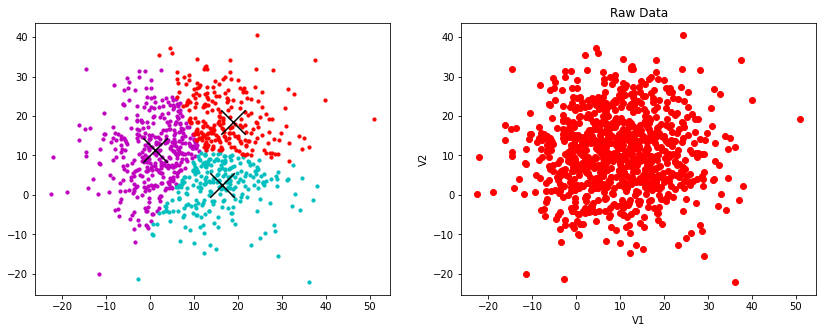

In [40]:
colors = 10 * ["m", "c", "r", "g", "b", "k"]


fig = plt.figure(figsize=(14, 5))

# Adds subplot on position 1
ax = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)

    
#plotting the clusters   
color_index = 0
for cluster in clusters:
    color = colors[color_index]
    for data_point in cluster:
        ax.scatter(data_point[0], data_point[1], color = color, s = 10)
    color_index += 1

#plotting the centroids
#plt.subplot(1, 2, 1)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('Clustered Data')
color_index_centroid = 0
for data_point in centroids:
    ax.scatter(data_point[:, 0], data_point[:, 1], marker = 'x', s = 600, color = 'black')
    color_index_centroid +=1

    
# plt.subplot(1, 2, 2) 
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('Raw Data')
for data_point in data:
    ax2.plot(data_point[0], data_point[1])
